In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from random import gauss, randrange

In [5]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

### Dados Governamentais

In [3]:
#Dados Governamentais
dados_analfabetismo = pd.read_excel('analfabetismo.xlsx')
dados_analfabetismo.head()

,Ano,Taxa
0,1992,16.44
1,1995,14.68
2,1998,12.86
3,1999,12.30
4,2001,11.40


In [4]:
serie_analfabetismo = pd.Series(dados_analfabetismo['Taxa'].values, index = dados_analfabetismo['Ano'])

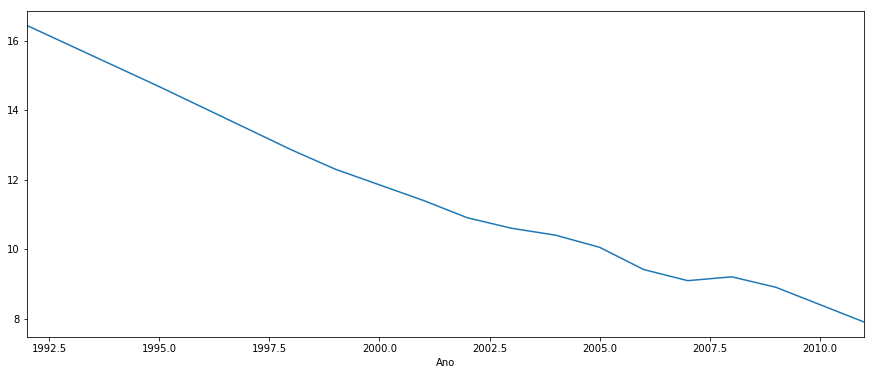

In [6]:
serie_analfabetismo.plot()
plt.show()

### Dados de Produção

In [7]:
## Produção de oléo no Brasil
dados_oleo = pd.read_excel('oil-production-tonnes.xls')
dados_oleo.head()

,Year,Million Tones
0,1965-01-01,5.033297
1,1966-01-01,6.147396
2,1967-01-01,7.738966
3,1968-01-01,8.504936
4,1969-01-01,9.277483


In [8]:
serie_oleo = pd.Series(dados_oleo['Million Tones'].values, index = dados_oleo['Year'])

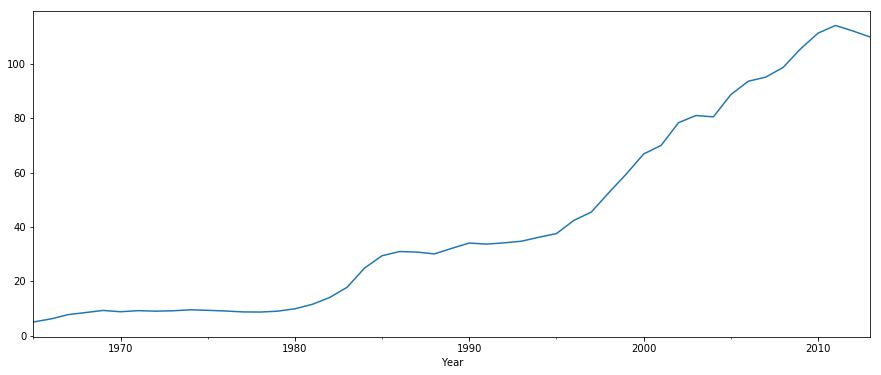

In [9]:
serie_oleo.plot()
plt.show()

### Dados naturais

In [10]:
## Série Sunspot
sunspot = pd.read_csv('sunspot.txt', header=None)
sunspot.columns = ['Sunspot']

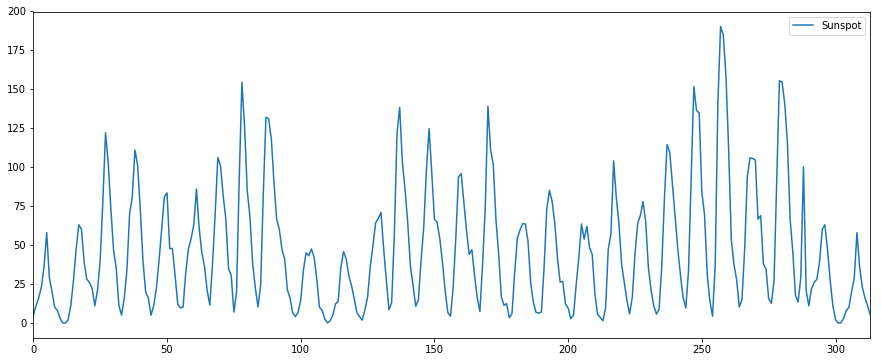

In [11]:
sunspot.plot()
plt.show()

### Dados Financeiros

In [12]:
microsoft = pd.read_csv('MSFT.csv', delimiter=';')
microsoft.head()

,Date,Open,High,Low,Close,Volume,Adj_Close
0,04/01/2010,30.62,31.10,30.59,30.95,38409100,28.09
1,05/01/2010,30.85,31.10,30.64,30.96,49749600,28.10
2,06/01/2010,30.88,31.08,30.52,30.77,58182400,27.93
3,07/01/2010,30.63,30.70,30.19,30.45,50559700,27.64
4,08/01/2010,30.28,30.88,30.24,30.66,51197400,27.83


In [13]:
serie_microsoft = pd.Series(microsoft['Adj_Close'])

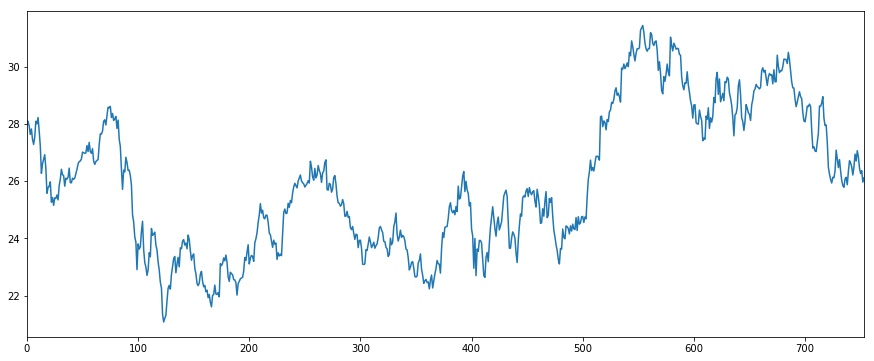

In [14]:
serie_microsoft.plot()
plt.show()

### Dados de Médicina 

In [15]:
#serie de frequência cardiaca
fc_serie = pd.read_csv('hr.txt', header=None)
fc_serie.head()

,0
0,84.2697
1,84.2697
2,84.0619
3,85.6542
4,87.2093


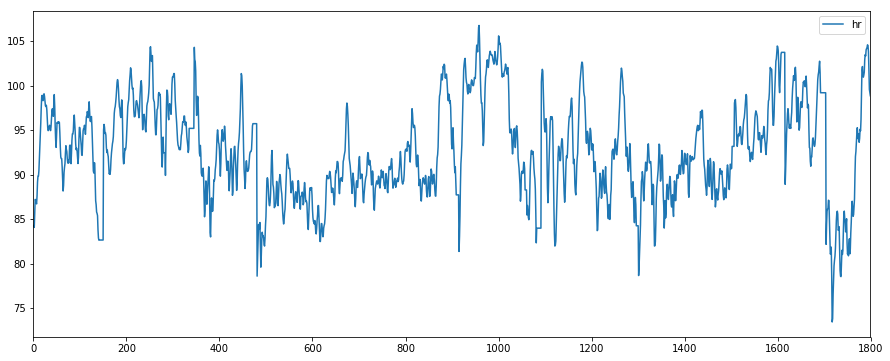

In [16]:
fc_serie.columns = ['hr']
fc_serie.plot()
plt.show()

## Modelos Simples de Séries Temporais

* Selecionar um modelo probabilístico __adequado__ para os dados é uma das partes mais __importantes__ da análise de séries temporais;
* Geralmente, é __suposto__ que cada __observação x__ seja um valor resultante de uma determinada __variável aleatória X__;
* Um __modelo__ de série temporal para um determinado dado observado $x_{t}$ é a especificação da composição de distribuições da sequência da variável aleatória $X_{t}$ em que $x_{t}$ é uma observação;


### Modelos Simples com média zero

* Ruído I.I.D (Independente e Identicamente Distribuído);
* Processo Binário;
* Random Walk;


#### Ruído I.I.D 

* Modelo mais simples;
* Sem componentes de tendência e sazonalidade;
* As observações são resultados de variáveis aleátorias i.i.d com média zero;
* Não existe dependência entre as observações;
* Apesar de não ser interessante para predição, é um modelo que ajuda na construção e entendimento de modelos mais complexos;

In [17]:
## Série gerada por Ruído I.I.D Gaussiano 
dados_iid = [gauss(0.0, 1.0) for i in range(500)]
serie_iid = pd.Series(dados_iid)

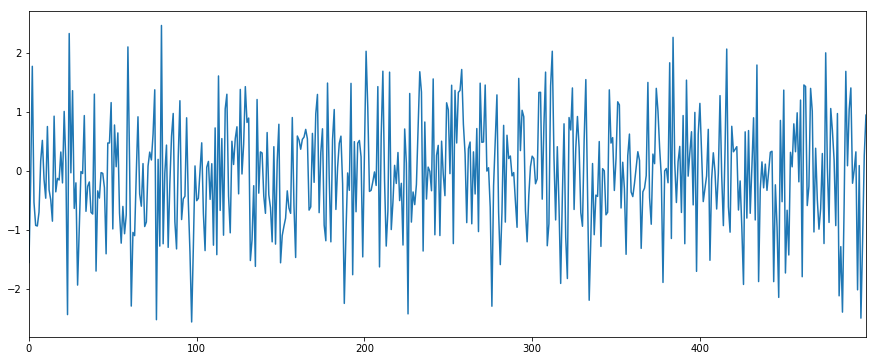

In [18]:
serie_iid.plot()
plt.show()

#### Processo Binário
* As observações só podem assumir dois valores possivéis

In [20]:
serie_vitorias = pd.read_csv('vitorias.txt', header=None)

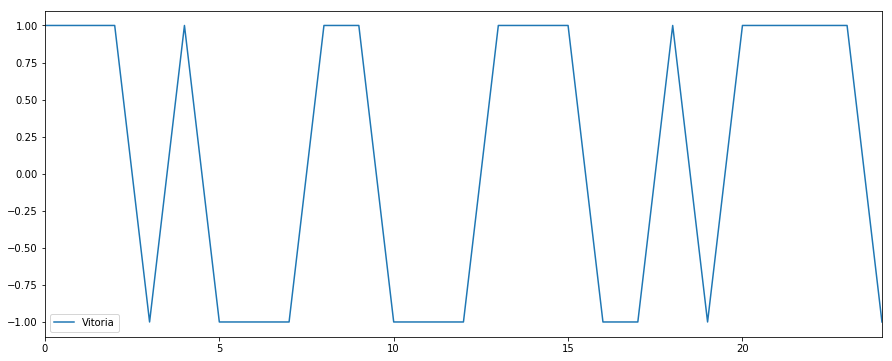

In [21]:
serie_vitorias.columns = ['Vitoria']
serie_vitorias.plot()
plt.show()

#### Random Walk

* Idéia remete a “caminhada do bêbado”. Tomada de vários passos consecutivos, cada qual em uma direção aleatória;
* É obtido através da soma cumulativa de variáveis i.i.d aleatórias: $S_{t} = X_{1} + X_{2}, ..., + X_{t}$
* $X_{t}$ é um ruído i.i.d
* $S_{t} - S_{t-1} = X_{t}$

In [22]:
## Série gerada por um Random Walk
dados_randomwalk = [randrange(10) for i in range(100)]
serie_randomwalk = pd.Series(dados_randomwalk)

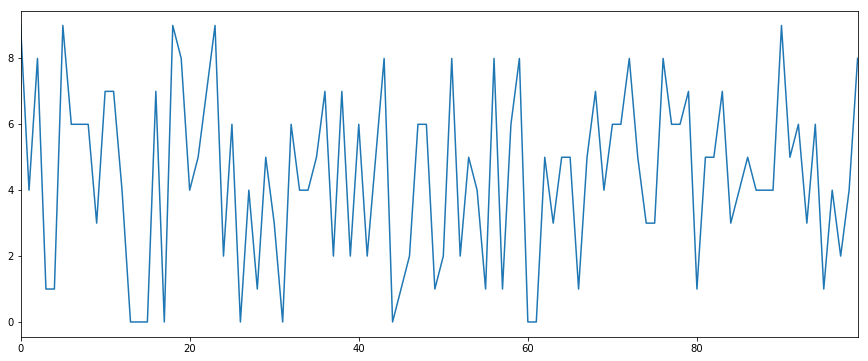

In [23]:
serie_randomwalk.plot()
plt.show()

### Modelos com tendência e sazonalidade
* Algumas séries é perceptível que não podem ser modeladas por modelos simples de média zero;
* São geradas com componentes de tendência e sazonalidade;
* __Tendência__: mudança sistemática na série temporal que não parece ser periódico;
* __Sazonalidade__: comportamento que se repete durante um período; 

$X_{t} = m_{t} + s_{t} + Y_{t}$


###  Modelo com Tendência

$$X_{t} = m_{t} + Y_{t}$$

$m_{t}$ é um componente de tendência e pode ser estimado através do método de mínimo quadrado:

$$m_{t} = a_{0}+a_{1}t+ a_{2}t^2$$

Os valores de $a$ são ajustados para minimizar a função: 
$$\sum_{t=1}^{n} (x_{t} - m_{t})^2$$

In [25]:
## série com tendência
dados_shampoo = pd.read_csv('sales-of-shampoo-over-a-three-ye.csv')

In [26]:
serie_shampoo = pd.Series(dados_shampoo['Sales of shampoo over a three year period'].values, index = dados_shampoo['Month'])

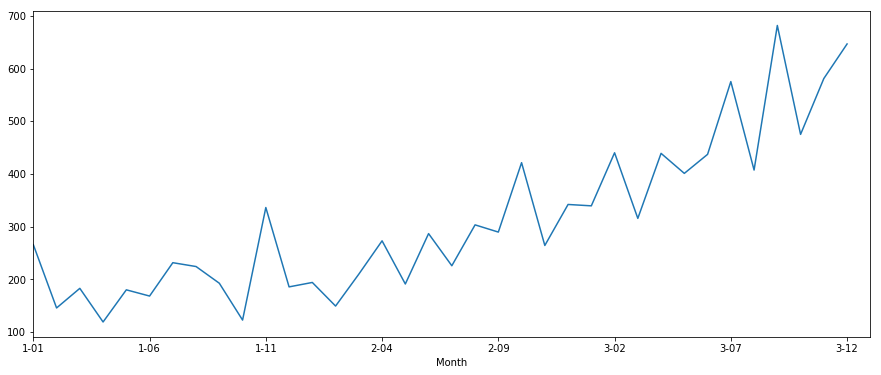

In [27]:
serie_shampoo.plot()
plt.show()

### Modelo com Sazonalidade 

$$X_{t} = s_{t} + Y_{t}$$

$S_{t}$ é o componente de sazonalidade, resultado de uma função periódica que pode ser obtida através da soma de ondas senoidais:

$$s_{t} = \alpha_{0} + \sum_{j=1}^{k} (a_{j} cos(\lambda_{j}t) + b_{j}sin(\lambda_{j}t))$$ 

$a$ e $b$ são parâmetros desconhecidos e $\lambda$ são as frequências

In [28]:
## Série com Sazonalidade
serie_airline = pd.read_csv('airline.txt', header=None)
serie_airline.columns = ['Airline']

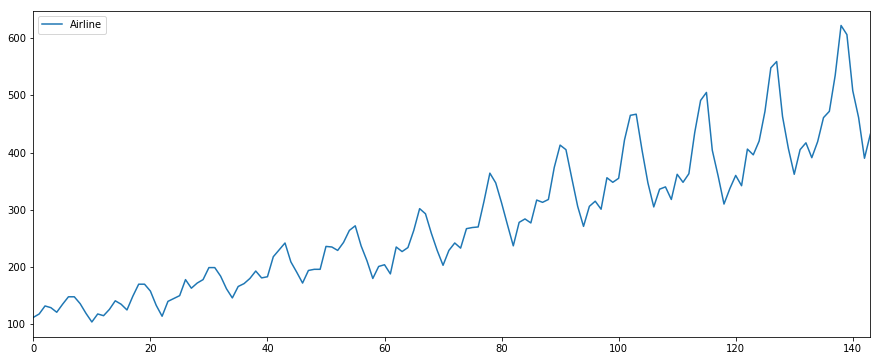

In [29]:
serie_airline.plot()
plt.show()

## Uma abordagem Geral para modelagem de séries temporais

### >Plotar a série e analisar alguns aspectos:
* Tendência
* Componentes sazonais
* Alterações acentuadas no comportamento
* Observações discrepantes com os dados

### >Remover tendências e componentes sazonais para obter resíduos estacionários;

### >Escolher um modelo para ajustar aos resíduos;

### >Alcançar a previsão original da série através da previsão dos resíduos;

## Modelos Estacionários 

É um processo que se mantém em __equilíbrio estatístico__ com propriedades
probabilísticas que __não se alteram no tempo__;

Algumas propriedades:
* $X_{t}$ é uma série temporal com $E(x_{t}^2) < \infty $
* A média de $X_{t}$ é $\mu_{x}(t)= E(x_{t})$
* A covariância $\gamma_x (r,s) =   Cov(X_{r}, X_{s} = E[(X_r - \mu_x(r))(X_s - \mu_x(s))]$ para todos inteiros $r$ e $s$

É considerado __um processo com estacionaridade fraca__ se:
*  As características de $Z_{t+T}$ são iguais para todo $T$;
*  Média e variância constantes;
* $\mu_x(t)$ é independente de $t$;
* A covariância $\gamma_x (t+h,t)$ é independente de $t$ para cada $h$;

### Função de Autocorrelação

Seja $X_{t}$ uma série estacionária, a __Função de Autocovariância__ do lag $h$ é:
$$\gamma_x = Cov(X_{t+h}, X_t) $$

A autocorrelação é a correlação entre uma série e ela mesma defasada; 


### Função de Autocorrelação Amostral

* Utilizada para analisar o grau de dependência temporal na série;
* Auxilia na seleção de possíveis modelos de séries temporais estacionárias;
* Definição: 

     Seja $x_1, …, x_n$ observações de uma série temporal. A média amostral é definida como:
     
     $$\bar{x} = \frac{1}{n}  \sum_{t=1}^{n} x_t$$
     A função de autocovariância amostral é definida como:
     $$\hat{\gamma }(h) = n^{-1} \sum_{t=1}^{n-|h|}(x_{t+|h|} - \bar{x})(x_t - \bar{x}) -n < h < n $$
     A função de autocorrelação amostral é definida como:
     $$\hat{\rho} =  \frac{\hat{\gamma}(h)}{\hat{\gamma}(0)}, -n<h<n$$
     
### Correlograma

* Forma gráfica de analisar a autocorrelação;
* O correlograma traça as autocorrelações em diversas defasagens;
* Através da análise utilizando o correlograma é possível entender se a série é aleatória ou possui alguma tendência ou sazonalidade;
* Frequentemente utilizado para analisar os resíduos de um modelo; 

In [30]:
from statsmodels.graphics.tsaplots import plot_acf

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


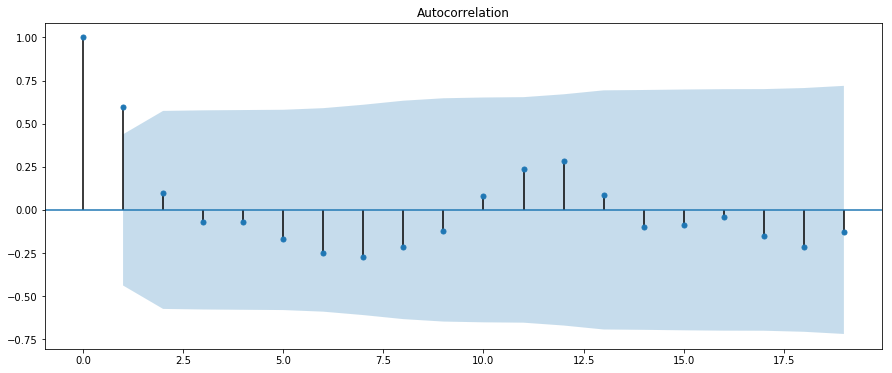

In [31]:
plot_acf(serie_airline[0:20])
plt.show()

* O Gráfico é composto por valores exibidos em pontos/barra que representam o coeficiente de correlação amostral __r__. Esse coeficiente é uma medida de direção e grau entre duas variáveis quantitativas que se associam linearmente; 
* Para inferir se em um dado lag existe ou não correlação é utilizado intervalos de confiança;
* Para um intervalo de confiança de 95% os limites são ± 1.96/√n
* Os lag com coeficiente __r__ fora do intervalo de confiança são considerados significantes. 
* O coeficiente com valor 1 representa correlação máxima positiva;
* O coeficiente com valor -1 representa correlação máxima negativa;
* O coeficiente com valor 0 representa que não existe correlação; 

### Utilizando correlograma em série aleátoria

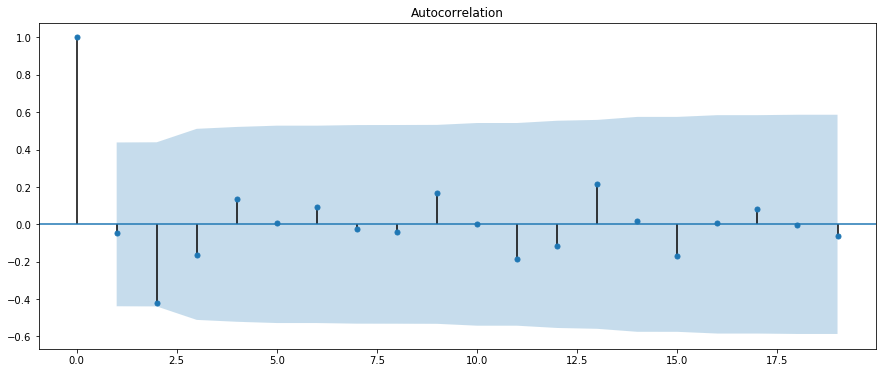

In [32]:
plot_acf(serie_iid[0:20])
plt.show()

* Através do correlograma é possível analisar se uma série é aleatória ou não;
* Em uma série completamente aleatória os lags são não correlacionados, ou seja, espera-se que o coeficiente de autocorrelação amostral rk seja próximo à zero, k = 1,2,....

### Correlação de curto prazo

* É dita de curto prazo quando uma observação acima da média tende a ser seguida por uma ou mais observações acima da média. O mesmo ocorre para observações abaixo da média.
* O correlograma desta série será composto por um valor relativamente grande para __r1__ seguido por valores que tendem a ficar sucessivamente menores;
* A partir de uma certa defasagem __k__ os valores de __rk__ tendem a ser aproximadamente zero.

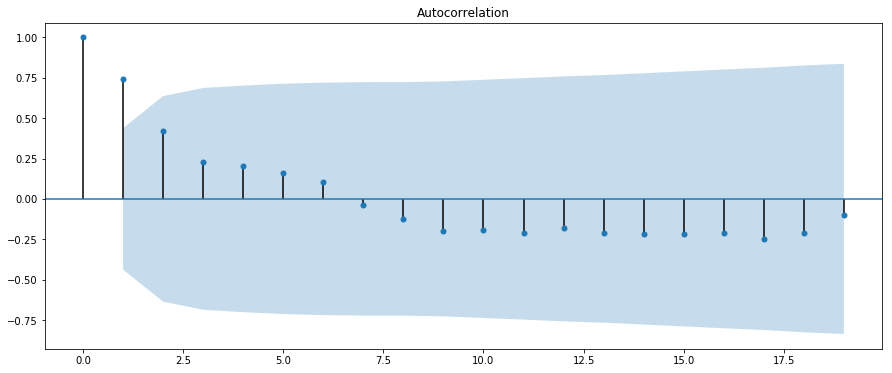

In [33]:
plot_acf(serie_microsoft[0:20])
plt.show()

### Correlação negativa

* Quando os valores das observações tendem a se alternar acima e abaixo de uma média, o coeficiente de correlação também tende a se alternar;
* O valor de __r1__ será negativo enquanto o valor de __r2__ será positivo já que as observações defasadas de 2 períodos (lags) tendem a estar do mesmo lado da média; 

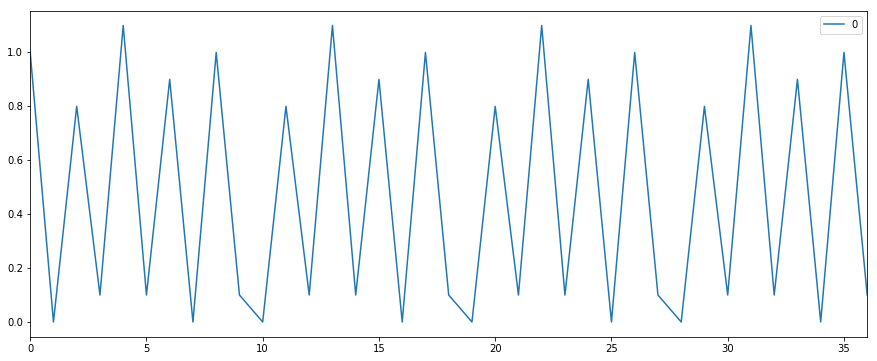

In [34]:
serie_media = pd.read_csv('serie_media.txt', header = None)
serie_media.plot()
plt.show()

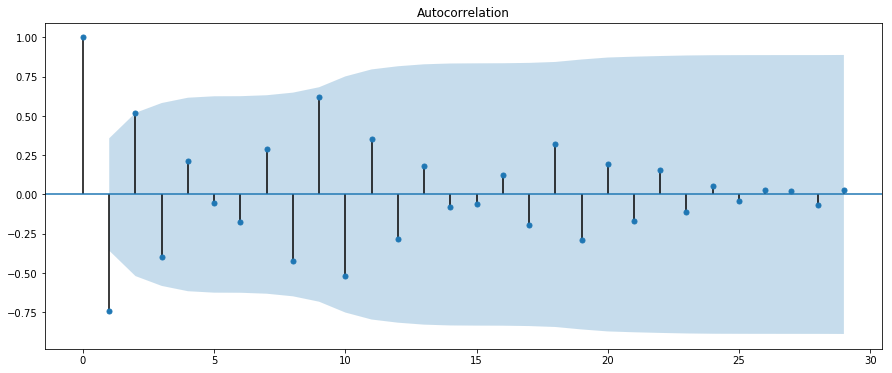

In [35]:
plot_acf(serie_media[0:30])
plt.show()

### Série Não estacionária
* Para uma série com tendência os valores do coeficiente r não decaem para zero a não ser em defasagens grandes. Isso ocorre pois uma observação de um lado da média tende a ser seguida por um grande número de observações da mesma média (mesmo lado) por conta da tendência;
* Nesse caso, pouca ou nenhuma informação pode ser obtida do correlograma pois a tendência dominará outras características;


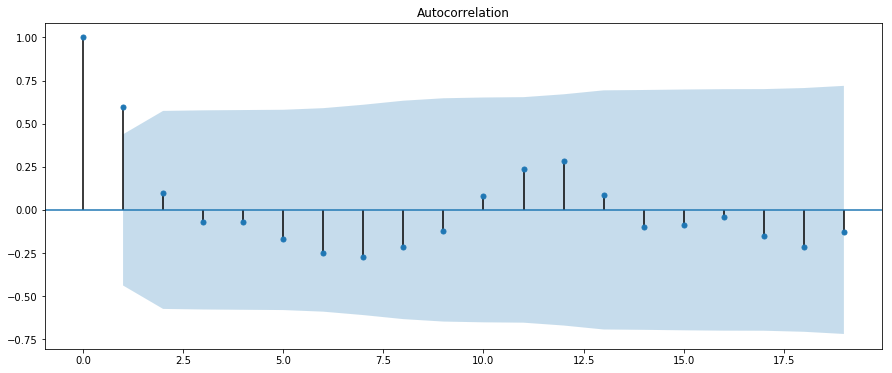

In [37]:
plot_acf(serie_airline[0:20])
plt.show()